In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def load_data(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       ])),
        batch_size=train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       ])),
        batch_size=test_batch_size, shuffle=True)
    return (train_data, test_data)

In [13]:
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 6)
        self.fc2 = nn.Linear(6, 8)
        self.fc3 = nn.Linear(8, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 40)
        self.fc2 = nn.Linear(40, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 15)
        self.fc2 = nn.Linear(15, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [14]:
train_batch_size = 50
test_batch_size = 100
train_data, test_data = load_data(train_batch_size, test_batch_size)
epochs = 10

In [15]:
def calc_params(model):
    return sum(p.numel() for p in model.parameters())
def define_optimizer(model):
    return optim.Adam(model.parameters(), lr = 0.0001)

In [16]:
def train(model, optimizer, train_data, loss_fn):
    model.train()

    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data.view(-1,784))
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [17]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)


In [18]:
def compute(model, optimizer):
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data, loss_fn)
        train_loss, train_acc = calculate_loss(model, train_data, loss_fn)
        test_loss, test_acc = calculate_loss(model, test_data, loss_fn)
    loss_train_arr.append(train_loss)
    loss_test_arr.append(test_loss)
    param_arr.append(calc_params(model))
    print("Model Train loss: ", train_loss)
    print("Model Test loss: ", test_loss)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)

In [19]:
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []

In [20]:
model1 = Model1()
print("Model 1 parameters: ", (calc_params(model1)))
optimizer = define_optimizer(model1)
compute(model1, optimizer)

model2 = Model2()
print("Model 2 parameters: ", (calc_params(model2)))
optimizer = define_optimizer(model2)
compute(model2, optimizer)

model3 = Model3()
print("Model 3 parameters: ", (calc_params(model3)))
optimizer = define_optimizer(model3)
compute(model3, optimizer)

model4 = Model4()
print("Model 4 parameters: ", (calc_params(model4)))
optimizer = define_optimizer(model4)
compute(model4, optimizer)

model5 = Model5()
print("Model 5 parameters: ", (calc_params(model5)))
optimizer = define_optimizer(model5)
compute(model5, optimizer)

Model 1 parameters:  4856
Model Train loss:  tensor(0.5595)
Model Test loss:  tensor(0.5465)
Model 2 parameters:  33960
Model Train loss:  tensor(0.1978)
Model Test loss:  tensor(0.2020)
Model 3 parameters:  14385
Model Train loss:  tensor(0.2396)
Model Test loss:  tensor(0.2402)
Model 4 parameters:  102070
Model Train loss:  tensor(0.1225)
Model Test loss:  tensor(0.1325)
Model 5 parameters:  9960
Model Train loss:  tensor(0.2551)
Model Test loss:  tensor(0.2572)


In [21]:
temp_1 = []
for i in loss_train_arr:
    temp_1.append(i.data.numpy().tolist())

temp_2 = []
for i in loss_test_arr:
    temp_2.append(i.data.numpy().tolist())

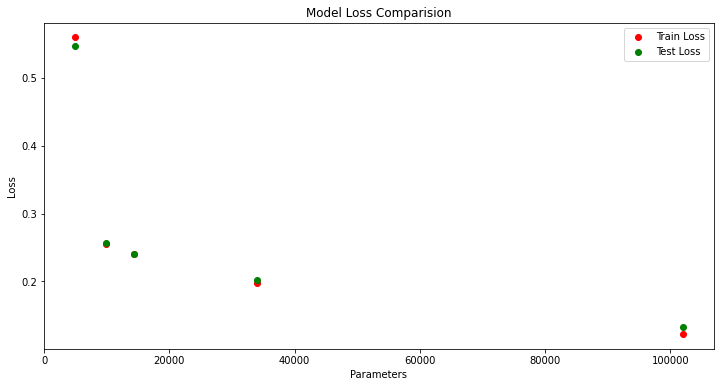

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, temp_1, color = "r")
plt.scatter(param_arr, temp_2, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

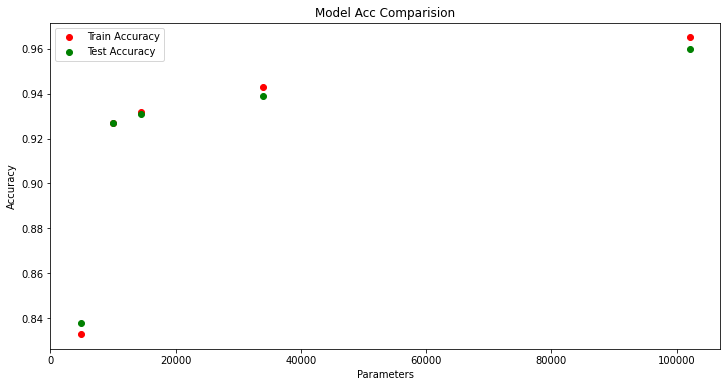

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, train_acc_arr, color = "r")
plt.scatter(param_arr, test_acc_arr, color = "g")
plt.title('Model Acc Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()